**Stock Prediction**

**Step 1: Install Required Libraries**

In [4]:
!pip install numpy pandas matplotlib tensorflow yfinance scikit-learn


     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.0/3.0 MB 991.0 kB/s eta 0:00:03
     ----- ---------------------------------- 0.4/3.0 MB 5.1 MB/s eta 0:00:01
     ---------- ----------------------------- 0.8/3.0 MB 6.2 MB/s eta 0:00:01
     ------------- -------------------------- 1.0/3.0 MB 5.7 MB/s eta 0:00:01
     --------------- ------------------------ 1.2/3.0 MB 5.2 MB/s eta 0:00:01
     --------------- ------------------------ 1.2/3.0 MB 5.3 MB/s eta 0:00:01
     --------------- ------------------------ 1.2/3.0 MB 5.3 MB/s eta 0:00:01
     ------------------- -------------------- 1.5/3.0 MB 4.0 MB/s eta 0:00:01
     ------------------------- -------------- 1.9/3.0 MB 4.6 MB/s eta 0:00:01
     --------------------------- ------------ 2.1/3.0 MB 4.5 MB/s eta 0:00:01
     ------------------------------ --------- 2.2/3.0 MB 4.5 MB/s eta 0:00:01
     ------------------------------- -------- 2.3/3.0 MB 4.4 MB/s eta

**Step 2: Import Libraries**

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


**Step 3: Load the Stock Data**

In [13]:
# Download the stock data
df = yf.download('AAPL', start='2010-01-01', end='2024-01-01')
df.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454505,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465664,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362821,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351056,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800


**Step 4: Preprocess the Data**

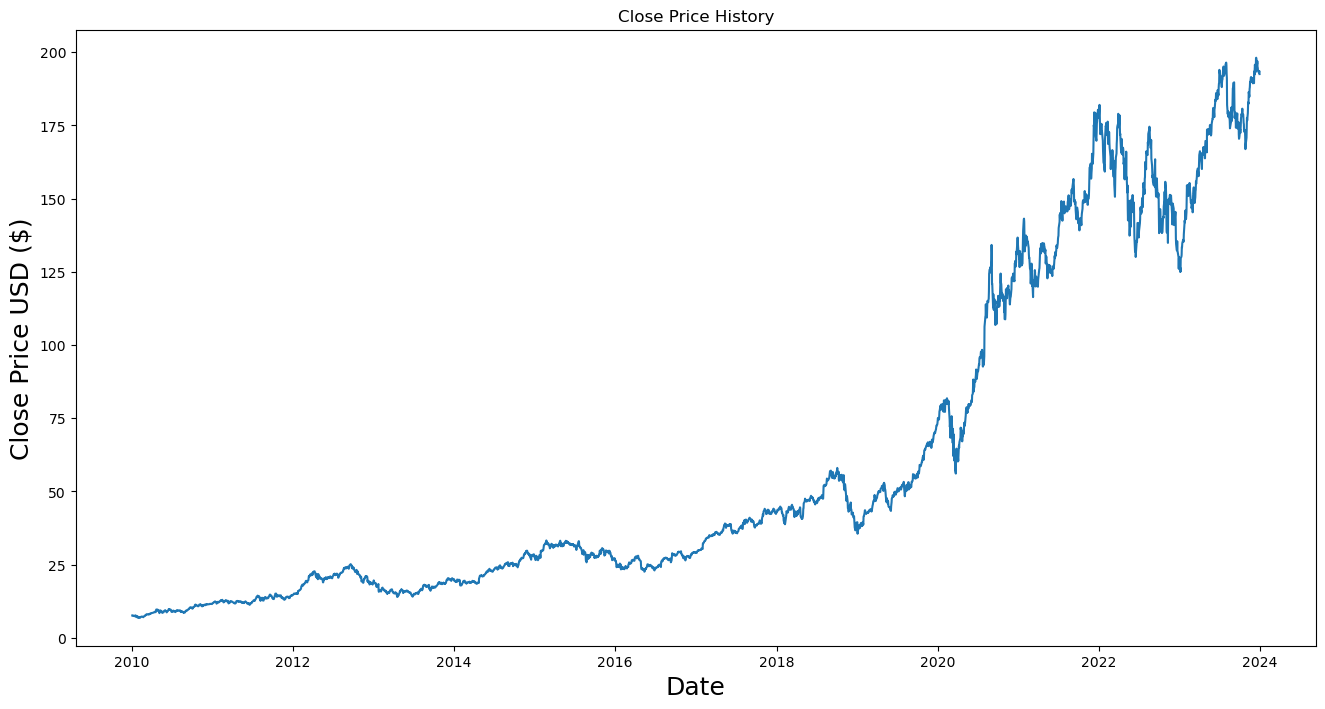

In [17]:
# Plot the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train=[]
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


**Step 5: Build the LSTM Model**

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input

# Build the LSTM model
model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))  # Use Input layer to specify input shape
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
 
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


3286/3286 ━━━━━━━━━━━━━━━━━━━━ 88s 25ms/step - loss: 0.0016


In [24]:
!pip install numpy pandas matplotlib tensorflow yfinance scikit-learn

**Step 6: Create the Testing Data Set**

In [21]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


**Step 7: Evaluate the Model**

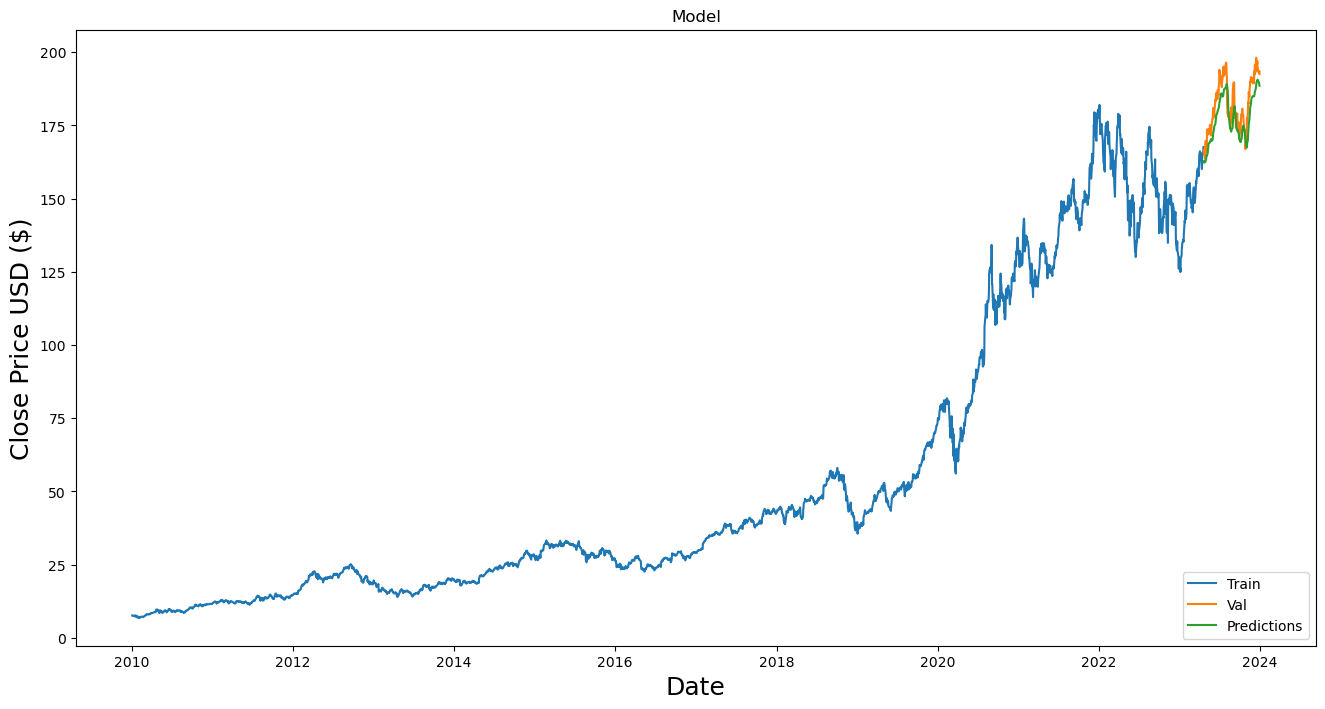

,Close,Predictions
Date,,
2023-04-20,166.649994,162.304520
2023-04-21,165.020004,162.824524
2023-04-24,165.330002,162.980331
2023-04-25,163.770004,163.007721
2023-04-26,163.759995,162.755310
...,...,...
2023-12-22,193.600006,190.233383
2023-12-26,193.050003,189.795990
2023-12-27,193.149994,189.290039


In [23]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:].copy()  # Use .copy() to create a copy of the DataFrame

# Add the predictions to the valid DataFrame
valid.loc[:, 'Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Print the valid and predicted prices
valid
